<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/NLP%20Wikidocs_newsdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


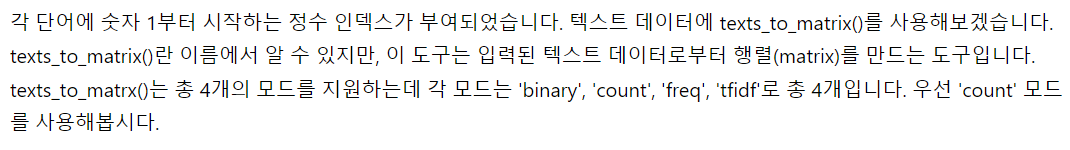

In [4]:
print(tokenizer.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


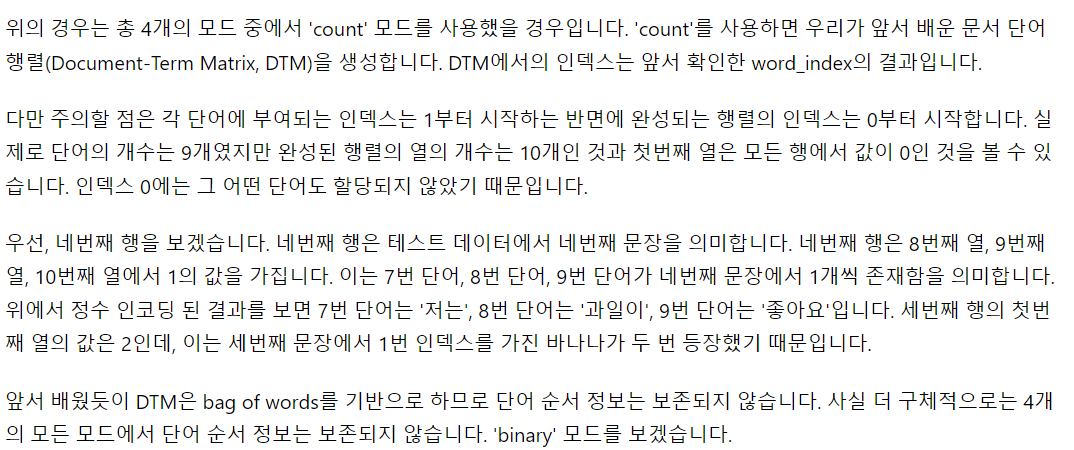

In [5]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


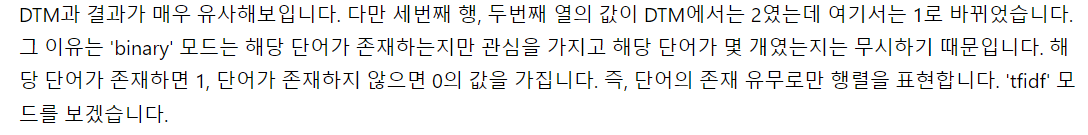

In [6]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


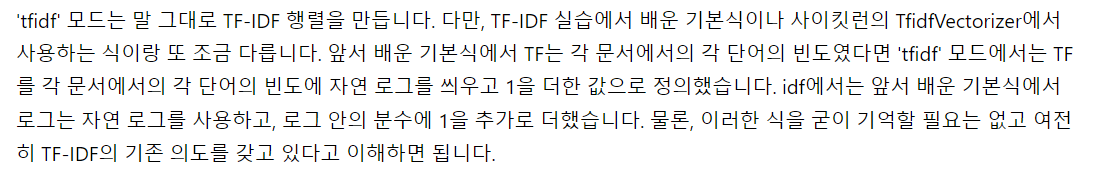

In [7]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


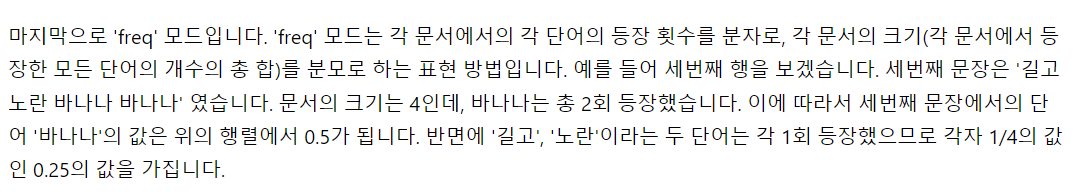

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [9]:
newsdata = fetch_20newsgroups(subset = 'train') #train data만 리턴함.

In [10]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


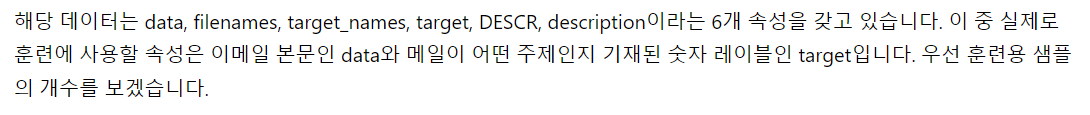

In [11]:
print('훈련용 샘플 갯수 : ', len(newsdata.data))
print('총 주제의 갯수 : ', len(newsdata.target_names))
print(newsdata.target_names)

훈련용 샘플 갯수 :  11314
총 주제의 갯수 :  20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [12]:
print(newsdata.target[0])

7


In [13]:
print('7번이 의미하는 주제', newsdata.target_names[7])

7번이 의미하는 주제 rec.autos


In [14]:
print(newsdata.data[0]) #첫번째 샘플 출력하기.

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [15]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [17]:
#null값 확인
data.isnull().values.any()

False

In [18]:
print('중복을 제외한 샘플의 수 : ', data['email'].nunique()) #nunique는 중복 제거 후 갯수
print('중복을 제외한 주제의 수 : ', data['target'].nunique())

중복을 제외한 샘플의 수 :  11314
중복을 제외한 주제의 수 :  20


<Axes: >

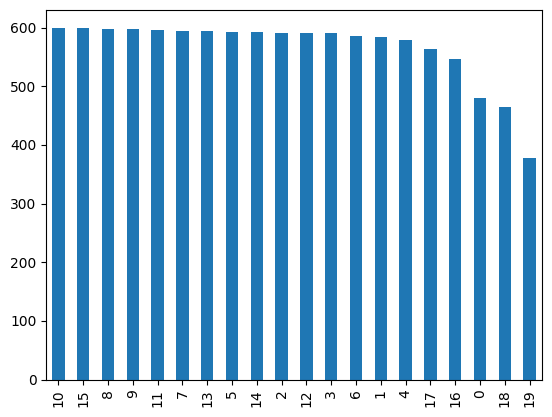

In [23]:
# label의 분포 시각화해보기.

data['target'].value_counts().plot(kind='bar')

In [24]:
#label 갯수 확인

print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [25]:
#Data 준비하기

newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

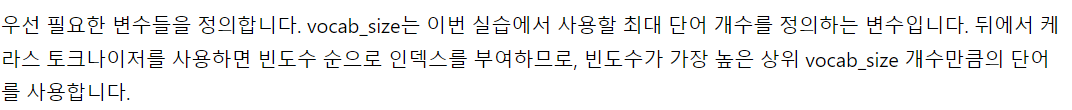

In [26]:
vocab_size = 10000
num_classes = 20

In [27]:
def prepare_data(train_data, test_data, mode):
  tokenizer = Tokenizer(num_words = vocab_size) #vocab_size 개수만큼의 단어만 사용함.
  tokenizer.fit_on_texts(train_data)
  X_train = tokenizer.texts_to_matrix(train_data, mode=mode) #샘플 수 x vocab_size 행렬 생성
  X_test = tokenizer.texts_to_matrix(test_data, mode=mode) #샘플 수 x vocab_size 행렬 생성
  return X_train, X_test, tokenizer.index_word

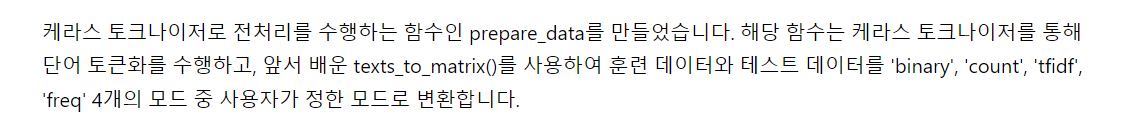

In [28]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') #mode를 binary로 변환
y_train = to_categorical(train_label, num_classes) #onehot encoding
y_test = to_categorical(test_label, num_classes) #onehot encoding

In [29]:
print('훈련 샘플 본문의 크기 : ', X_train.shape)
print('훈련 샘플 레이블의 크기 : ', y_train.shape)
print('테스트 샘플 본문의 크기 : ' ,X_test.shape)
print('테스트 샘플 레이블의 크기 : ',y_test.shape)

훈련 샘플 본문의 크기 :  (11314, 10000)
훈련 샘플 레이블의 크기 :  (11314, 20)
테스트 샘플 본문의 크기 :  (7532, 10000)
테스트 샘플 레이블의 크기 :  (7532, 20)


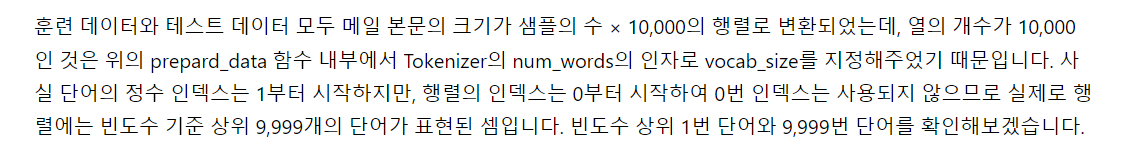

In [30]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [31]:
#MLP 설계해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [36]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]


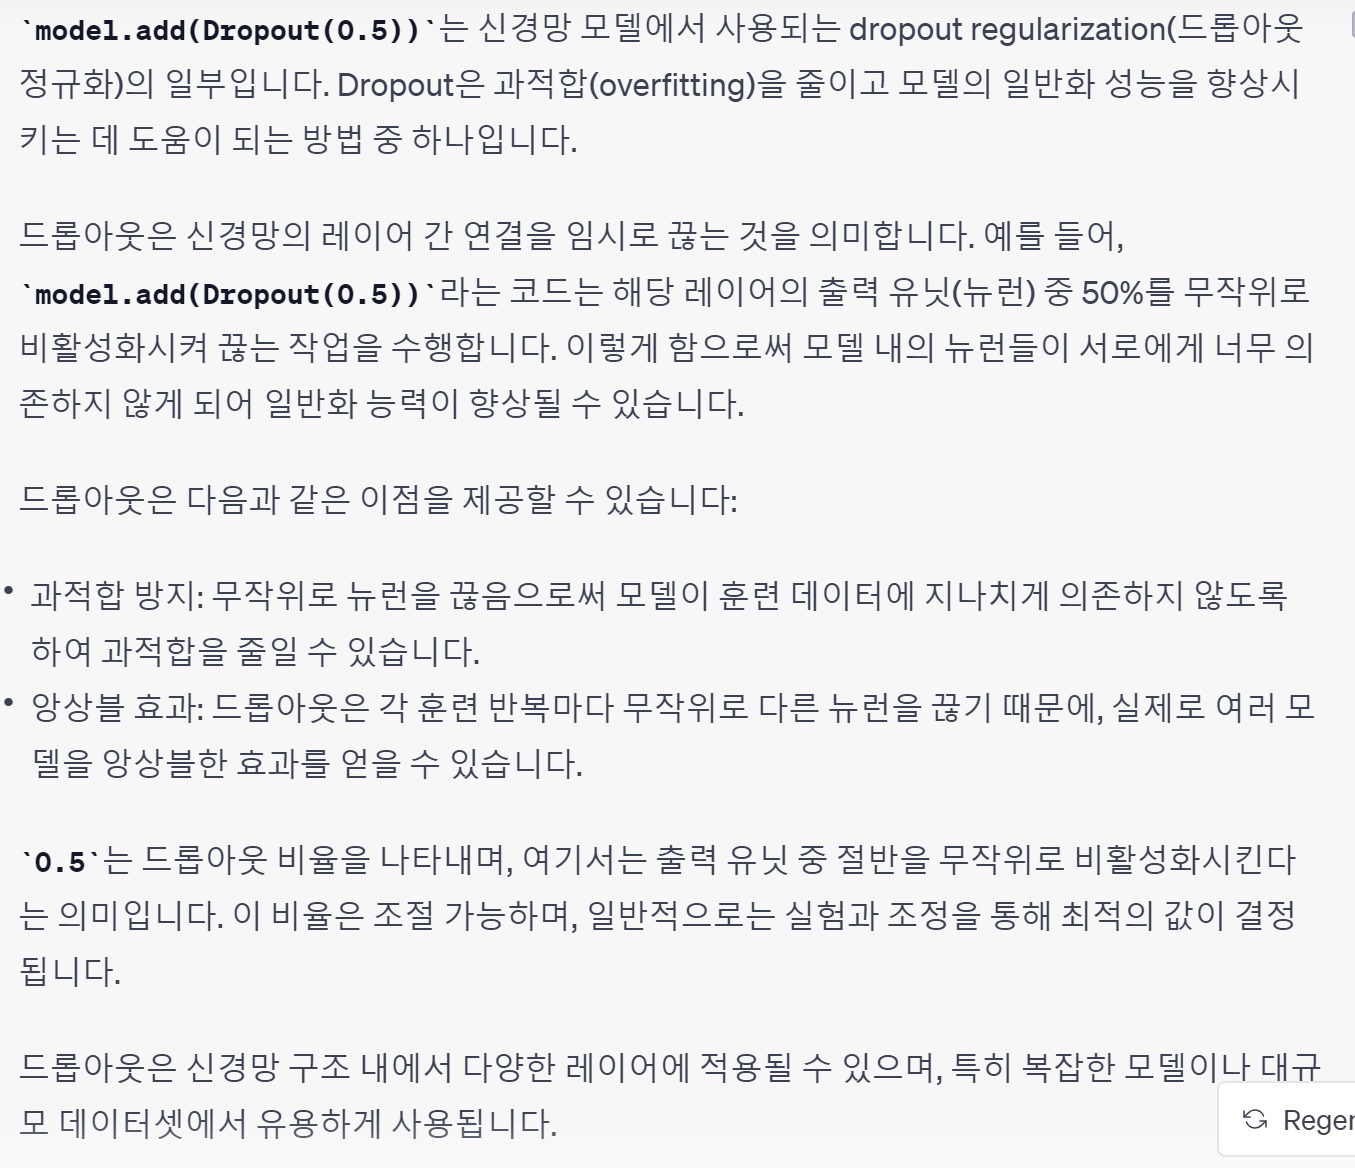

In [37]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)


Epoch 1/5
80/80 [==============================] - 7s 10ms/step - loss: 2.2473 - accuracy: 0.3476 - val_loss: 0.9210 - val_accuracy: 0.8330
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 0.8704 - accuracy: 0.7621 - val_loss: 0.4607 - val_accuracy: 0.8869
Epoch 3/5
80/80 [==============================] - 1s 7ms/step - loss: 0.4243 - accuracy: 0.8884 - val_loss: 0.3517 - val_accuracy: 0.9037
Epoch 4/5
80/80 [==============================] - 1s 7ms/step - loss: 0.2575 - accuracy: 0.9364 - val_loss: 0.3033 - val_accuracy: 0.9081
Epoch 5/5
80/80 [==============================] - 1s 7ms/step - loss: 0.1696 - accuracy: 0.9583 - val_loss: 0.3066 - val_accuracy: 0.9108
binary 모드의 테스트 정확도: 0.8283324241638184
Epoch 1/5
80/80 [==============================] - 2s 10ms/step - loss: 2.7920 - accuracy: 0.2315 - val_loss: 1.7397 - val_accuracy: 0.7253
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 1.5104 - accuracy: 0.6124 - val_loss: 0.7580 - val_acc